# **Coursera Capstone Project:**
# **Neighborhood opportunity for a Security Service in Denver, Colorado** 
### _by Fabian Williams_
November 2019

## Table of Contents

### [Part 1: Business Problem and Data Description](#Part1:_Business_problem_and_data_description)

* [Introduction](#Introduction)
* [The Business Problem](#The_Business_Problem)
* [Data Processing & Description](#Data_Processing_&_Description)

### [Part 2: Connect to FourSqaure API and Data Clustering](#Part2:_Connect_to_Foursquare_API_and_DataClustering)

* [Methodology](#Methodology)
* [Results](#Results)
* [Discussion](#Discussion)
* [Conclusion](#Conclusion)
* [References](#References)

## **Part 1: Business problem and data description**

## **Introduction**
The intent of this project is to provide investors information to support their decision to establish a security service in Denver, Colorado. This document was prepared based on several months of research, data extraction and analysis. The information used in this report is real and was accessed from the Denver, CO county database and clusters using the Foursquare api.

**About Denver, Colorado**  
Denver, is the capital of the U.S. state of Colorado. Denver is located in the South Platte River Valley on the western edge of the High Plains just east of the Front Range of the Rocky Mountains. The Denver downtown district is immediately east of the confluence of Cherry Creek with the South Platte River, approximately 12 mi (19 km) east of the foothills of the Rocky Mountains. Denver is named after James W. Denver, a governor of the Kansas Territory. It is nicknamed the Mile High City because its official elevation is exactly one mile (5280 feet or 1609.3 meters) above sea level.

Denver is ranked as a _Beta_ world city by the Globalization and World Cities Research Network. With an estimated population of 716,492 in 2018, Denver is the 19th-most populous U.S. city, and with a 19.38% increase since the 2010 United States Census, it has been one of the fastest-growing major cities in the United States. 

* The 10-county Denver-Aurora-Lakewood, CO Metropolitan Statistical Area had an estimated 2018 population of 2,932,415 and is the 19th most populous U.S. metropolitan statistical area.
* The 12-city Denver-Aurora, CO Combined Statistical Area had an estimated 2018 population of 3,572,798 and is the 15th most populous U.S. metropolitan area.
* In 2016, Denver was named the best place to live in the United States by U.S. News & World Report.

## The Business Problem
Though rated the best place to live can, it considered a safe place to do business. Investors in a security firm would like to perform a study of the neighborhood crime within Denver, CO, specifically burglary. The company's intent is to identify neighbourhoods with high burglary rates. The crimes within a city are varied, but this frim speciallizes in anti-burglary security services. One of the key features of the security service is the installation of closed circuit camera grid near businesses. The segmentation of these businesses will also form apart of the project planning process, as all neighborhoods will not be launched at the same time.

Other uses of the case study:
* Families or individuals relocating to Denver, CO
* Real Estate companies seeking key selling features of the city, as the venues are clustered
* City Offices/Governor looking to gentrify a high crime area.

##### **Success Criteria: Use the data to recommend the first neighborhood to be launched.**

## Data Processing & Description
This project will require the analysis of Denver, CO neighborhood crime statistics and the clustering of the neighborhoods in order to recommend the first neighbourhood. 

The crime database accessed for this project was from www.denvergov.org. This database provided the Denver, CO crime data: https://www.denvergov.org/media/gis/DataCatalog/crime/csv/crime.csv. 
* Author: City and County of Denver, Denver Police Department / Data Analysis Unit
* Maintainer: City and County of Denver, Technology Services / DenverGIS Data
* Version: 1.0.2921
* Data was last updated on 11/21/2019

This dataset includes criminal offenses in the City and County of Denver for the previous five calendar years plus the current year to date. The data is based on the National Incident Based Reporting System (NIBRS) which includes all victims of person crimes and all crimes within an incident. The data is dynamic, which allows for additions, deletions and/or modifications at any time, resulting in more accurate information in the database. Due to continuous data entry, the number of records in subsequent extractions are subject to change. Crime data is updated Monday through Friday. Crimes that occurred at least 30 days ago tend to be the most accurate, although records are returned for incidents that happened yesterday. This dynamic nature of crime data means that content provided here today will probably differ from content provided a week from now. Likewise, content provided on this site will probably differ somewhat from crime statistics published elsewhere by the City and County of Denver, even though they draw from the same database. Crime locations reflect the approximate locations of crimes but are not mapped to actual property parcels. Certain crimes may not appear on maps if there is insufficient detail to establish a specific, mappable location. 

The database is imported using Pandas, and an initial view of data was created using Matplotlib, a horizontal bar chart. The data was wrangled to identify burglary crimes and then grouped by neighborhood. The data frame included the longitude and attitude of burglary crimes. The data extracted using from the Denver, CO.org crime database will be merged with FourSquare API data to explore the world around where burglary crimes have been committed.

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [2]:
# import crime data from Denver, CO county website:
dco_crime = pd.read_csv('https://www.denvergov.org/media/gis/DataCatalog/crime/csv/crime.csv')

In [3]:
# Denver, CO crime data table columns
dco_crime.dtypes

INCIDENT_ID                 int64
OFFENSE_ID                  int64
OFFENSE_CODE                int64
OFFENSE_CODE_EXTENSION      int64
OFFENSE_TYPE_ID            object
OFFENSE_CATEGORY_ID        object
FIRST_OCCURRENCE_DATE      object
LAST_OCCURRENCE_DATE       object
REPORTED_DATE              object
INCIDENT_ADDRESS           object
GEO_X                     float64
GEO_Y                     float64
GEO_LON                   float64
GEO_LAT                   float64
DISTRICT_ID                 int64
PRECINCT_ID                 int64
NEIGHBORHOOD_ID            object
IS_CRIME                    int64
IS_TRAFFIC                  int64
dtype: object

Not all the columns of this table is required, for the purpose of this report the relevant columns are:

* OFFENCE_CATEGORY_ID: the type of crime
* GEO_LON: longitude
* GEO_LAT: lattitue
* NEIGHBORHOOD_ID: name of the neighborhood
* IS_CRIME: crime committed using a boolean values 1 or 0

The data in these columns will be manipulated/wrangled to provide an initial veiw of the data before connecting with the Foursquare data.

In [4]:
# clean up the dataset to remove unnecessary columns
dco_crime.drop(['INCIDENT_ID','OFFENSE_ID','OFFENSE_CODE','OFFENSE_CODE_EXTENSION','OFFENSE_TYPE_ID','FIRST_OCCURRENCE_DATE','LAST_OCCURRENCE_DATE','REPORTED_DATE','INCIDENT_ADDRESS','GEO_X','GEO_Y','DISTRICT_ID','PRECINCT_ID','IS_TRAFFIC'],axis=1,inplace=True)

# make all column labels of type string
dco_crime.columns = list(map(str, dco_crime.columns))

#dropping null data from data set
dco_crime = dco_crime.dropna()

# reindexing data
dco_crime.reset_index(drop=True)

#view the first 5 rows
dco_crime.head()

,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME
0,all-other-crimes,-104.809881,39.773188,montbello,1
1,larceny,-104.781434,39.785649,gateway-green-valley-ranch,1
2,theft-from-motor-vehicle,-104.957381,39.663490,wellshire,1
3,larceny,-104.941440,39.702698,belcaro,1
4,larceny,-104.955370,39.717107,cherry-creek,1


In [5]:
#remove rows where IS_CRIME = 0
den_crime = dco_crime[dco_crime.IS_CRIME != 0]
df = den_crime.groupby('NEIGHBORHOOD_ID')
dencrime = df.head()
dencrime.reset_index(inplace=True)
dencrime

,index,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME
0,0,all-other-crimes,-104.809881,39.773188,montbello,1
1,1,larceny,-104.781434,39.785649,gateway-green-valley-ranch,1
2,2,theft-from-motor-vehicle,-104.957381,39.663490,wellshire,1
3,3,larceny,-104.941440,39.702698,belcaro,1
4,4,larceny,-104.955370,39.717107,cherry-creek,1
...,...,...,...,...,...,...
385,4857,theft-from-motor-vehicle,-104.971322,39.725463,country-club,1
386,5462,larceny,-104.968455,39.720895,country-club,1
387,5944,theft-from-motor-vehicle,-104.946732,39.662589,wellshire,1
388,10519,theft-from-motor-vehicle,-104.942485,39.666868,wellshire,1


In [6]:
# Type of Crimes committed in Denver, CO
df_crime = den_crime[['OFFENSE_CATEGORY_ID', 'IS_CRIME']]
dfc_plt = df_crime.groupby('OFFENSE_CATEGORY_ID').count()
dfc_plt.sort_values(by='IS_CRIME', ascending=False, inplace=True)
dfc_plt.reset_index(inplace=True)
dfc_plt.set_index('OFFENSE_CATEGORY_ID', inplace=True)
dfc_plt

,IS_CRIME
OFFENSE_CATEGORY_ID,
all-other-crimes,95181
public-disorder,54815
larceny,53753
theft-from-motor-vehicle,40295
drug-alcohol,34534
auto-theft,28200
other-crimes-against-persons,26040
burglary,26001
aggravated-assault,12627


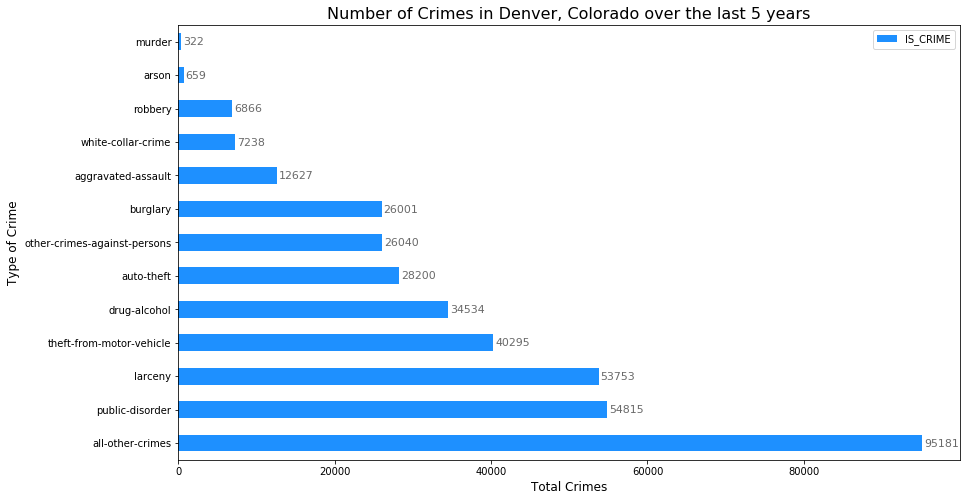

In [7]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

# generate plot
ax = dfc_plt.plot(kind='barh', figsize=(14, 8), color='dodgerblue')
ax.set_xlabel('Total Crimes', fontsize=12)
ax.set_ylabel('Type of Crime', fontsize=12)
ax.set_title('Number of Crimes in Denver, Colorado over the last 5 years', fontsize=16)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+250, i.get_y()+.15, \
            str(round((i.get_width()), 2)), fontsize=11, color='dimgrey')

plt.show()

In [8]:
#Show max rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Creating the Denver, CO burglary crime data frame
df_burglary = den_crime[den_crime.OFFENSE_CATEGORY_ID == 'burglary'].reset_index(drop=True)
df_burglary.drop(['OFFENSE_CATEGORY_ID','IS_CRIME'], axis=1, inplace=True)
df_burglary = df_burglary[['NEIGHBORHOOD_ID','GEO_LON','GEO_LAT']]
den_burglary = df_burglary.groupby('NEIGHBORHOOD_ID')
dco_burglary = den_burglary.first()
dco_burglary.reset_index(inplace=True)
dco_burglary

,NEIGHBORHOOD_ID,GEO_LON,GEO_LAT
0,athmar-park,-105.024240,39.697324
1,auraria,-105.004869,39.744035
2,baker,-104.992622,39.711534
3,barnum,-105.028408,39.712805
4,barnum-west,-105.052573,39.719299
5,bear-valley,-105.080551,39.662599
6,belcaro,-104.951857,39.702728
7,berkeley,-105.040096,39.781620
8,capitol-hill,-104.978476,39.738691
9,cbd,-104.994496,39.747944


In [9]:
!conda install -c conda-forge folium --yes
import folium
from folium import plugins

Solving environment: - 
  - anaconda::ca-certificates-2019.8.28-0, anaconda::openssl-1.1.1d-h1de35cc_2
  - anaconda::ca-certificates-2019.8.28-0, defaults::openssl-1.1.1d-h1de35cc_2
  - anaconda::openssl-1.1.1d-h1de35cc_2, defaults::ca-certificates-2019.8.28-0
  - defaults::ca-certificates-2019.8.28-0, defaults::openssl-1.1.1d-h1de35ccdone

# All requested packages already installed.



In [10]:
# Denver, C0 latitude and longitude values
latitude = 39.7392
longitude = -104.9903

# create map and display it
dco_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(dco_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label in zip(dencrime.GEO_LAT, dencrime.GEO_LON, dencrime.OFFENSE_CATEGORY_ID):
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
dco_map

In [11]:
# create map of Denver burglary neighborhoods using latitude and longitude values
map_denver = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(dco_burglary['GEO_LAT'], dco_burglary['GEO_LON'], dco_burglary['NEIGHBORHOOD_ID']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=1,
        parse_html=False).add_to(map_denver)  
    
map_denver

## **Part 2: Connect to FourSquare API and Data Clustering**

## **Methodology**

This analysis will be done using Python. Python is an interpreted, object-oriented, high-level programming language with dynamic semantics. Python has built in libraries that will be installed in a Python Notebook to perform the analysis. The primary libraries are as follows:
* Pandas data frame: the data will be aligned in a tabular fashion in rows and columns.
* Numpy is a general-purpose array-processing package
* Matplotlib: is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.
* Folium Python: helps to create several types of Leaflet maps. 
* Scikit-learn provides many unsupervised and supervised learning algorithms such as K Means clustering. Given a data set of items, with certain features, and values for these features (like a vector). The kMeans algorithm; an unsupervised learning algorithm, is used to categorize these items.

In [12]:
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

Solving environment: \ 
  - anaconda::ca-certificates-2019.8.28-0, anaconda::openssl-1.1.1d-h1de35cc_2
  - anaconda::openssl-1.1.1d-h1de35cc_2, defaults::ca-certificates-2019.8.28-0
  - anaconda::ca-certificates-2019.8.28-0, defaults::openssl-1.1.1d-h1de35cc_2
  - defaults::ca-certificates-2019.8.28-0, defaults::openssl-1.1.1d-h1de35ccdone

# All requested packages already installed.



In [13]:
# Explore the first neighborhood
dco_burglary.loc[0, 'NEIGHBORHOOD_ID']

'athmar-park'

In [14]:
# Get the neighborhood's latitude and longitude
neighborhood_latitude = dco_burglary.loc[0, 'GEO_LAT'] # neighborhood latitude value
neighborhood_longitude = dco_burglary.loc[0, 'GEO_LON'] # neighborhood longitude value

neighborhood_name = dco_burglary.loc[0, 'NEIGHBORHOOD_ID'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of athmar-park are 39.6973243, -105.0242402.


In [15]:
# Foursquare access credentials:
CLIENT_ID = 'RU1XT4GDWQX3JQNOEQDMTXMW1J3XOQIRUQXZ221VLIQVELYU' # Foursquare ID
CLIENT_SECRET = 'Y1PM10AAEGAXEH1BHTZOJ0H3SN4DTE5XPFG1D5TE3LT0HLNF' # Foursquare Secret
VERSION = '20180605' # Foursquare API version
{
    "tags": [
        "hide_input",
    ]
}

{'tags': ['hide_input']}

In [16]:
# Get the top 50 venues in athmar-park within 500m radius
LIMIT = 75 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

# get Four Square neighborhood data
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5de30468bae9a2001c1803d9'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Athmar Park',
  'headerFullLocation': 'Athmar Park, Denver',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 20,
  'suggestedBounds': {'ne': {'lat': 39.7018243045, 'lng': -105.0184026240417},
   'sw': {'lat': 39.692824295499996, 'lng': -105.03007777595829}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '49cebc09f964a5207f5a1fe3',
       'name': 'Star Kitchen',
       'location': {'address': '2917 W Mississippi Ave',
        'crossStreet': 'Federal and Mississippi',
        'lat': 39.69731156829677,
        'lng':

In [17]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [18]:
#Clean the json file and structure it for pandas df
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Star Kitchen,Dim Sum Restaurant,39.697312,-105.024279
1,Pho Duy,Vietnamese Restaurant,39.699758,-105.025382
2,Ba Le Sandwiches,Sandwich Place,39.697827,-105.024749
3,Pho 96,Vietnamese Restaurant,39.696476,-105.024713
4,Lao Wang Noodle House,Chinese Restaurant,39.699513,-105.025526


In [19]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

20 venues were returned by Foursquare.


In [20]:
#Function to repeat the same process to all the neighbourhoods

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
denver_venues = getNearbyVenues(names=dco_burglary['NEIGHBORHOOD_ID'],
                                   latitudes=dco_burglary['GEO_LAT'],
                                   longitudes=dco_burglary['GEO_LON']
                                  )

athmar-park
auraria
baker
barnum
barnum-west
bear-valley
belcaro
berkeley
capitol-hill
cbd
chaffee-park
cheesman-park
cherry-creek
city-park
city-park-west
civic-center
clayton
cole
college-view-south-platte
congress-park
cory-merrill
country-club
dia
east-colfax
elyria-swansea
five-points
fort-logan
gateway-green-valley-ranch
globeville
goldsmith
hale
hampden
hampden-south
harvey-park
harvey-park-south
highland
hilltop
indian-creek
jefferson-park
kennedy
lincoln-park
lowry-field
mar-lee
marston
montbello
montclair
north-capitol-hill
north-park-hill
northeast-park-hill
overland
platt-park
regis
rosedale
ruby-hill
skyland
sloan-lake
south-park-hill
southmoor-park
speer
stapleton
sun-valley
sunnyside
union-station
university
university-hills
university-park
valverde
villa-park
virginia-village
washington-park
washington-park-west
washington-virginia-vale
wellshire
west-colfax
west-highland
westwood
whittier
windsor


In [22]:
print(denver_venues.shape)
denver_venues.head()

(1413, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,athmar-park,39.697324,-105.02424,Star Kitchen,39.697312,-105.024279,Dim Sum Restaurant
1,athmar-park,39.697324,-105.02424,Pho Duy,39.699758,-105.025382,Vietnamese Restaurant
2,athmar-park,39.697324,-105.02424,Ba Le Sandwiches,39.697827,-105.024749,Sandwich Place
3,athmar-park,39.697324,-105.02424,Pho 96,39.696476,-105.024713,Vietnamese Restaurant
4,athmar-park,39.697324,-105.02424,Lao Wang Noodle House,39.699513,-105.025526,Chinese Restaurant


In [23]:
denver_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
athmar-park,20,20,20,20,20,20
auraria,16,16,16,16,16,16
baker,13,13,13,13,13,13
barnum,26,26,26,26,26,26
barnum-west,7,7,7,7,7,7
bear-valley,12,12,12,12,12,12
belcaro,4,4,4,4,4,4
berkeley,6,6,6,6,6,6
capitol-hill,62,62,62,62,62,62


In [24]:
print('There are {} uniques categories.'.format(len(denver_venues['Venue Category'].unique())))

There are 242 uniques categories.


For feature extraction One Hot Encoding is used in terms of categories. Therefore, each feature is a category that belongs to a venue. Each feature becomes binary, this means that 1 means this category is found in the venue and 0 means the opposite. Then, all the venues are grouped by the neighborhoods, computing at the same time the mean. This will give us a venue for each row and each column will contain the frequency of occurrence of that particular category.

In [25]:
#Analyzing Each Neighborhood

# one hot encoding
denver_onehot = pd.get_dummies(denver_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
denver_onehot['Neighborhood'] = denver_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [denver_onehot.columns[-1]] + list(denver_onehot.columns[:-1])
denver_onehot = denver_onehot[fixed_columns]

denver_onehot.head()

,Yoga Studio,ATM,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Assisted Living,Astrologer,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Board Shop,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Dive Bar,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Gay Bar,Gift Shop,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Health & Beauty Service,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Leather Goods Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,North Indian Restaurant,Opera House,Optical Shop,Organic Grocery,Other Repair Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Professional & Other Places,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roof Deck,Rugby Pitch,Salad Place,Salon / Barbershop,Salsa Club,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Sushi Restaurant,Taco Place,Tailor Shop,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Used Bookstore,Vape Store,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,athmar-park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [26]:
denver_onehot.shape

(1413, 242)

### Clustering

Clustering is one of the most common exploratory data analysis technique used to get an intuition about the structure of the data. It can be defined as the task of identifying subgroups in the data such that data points in the same subgroup (cluster) are very similar while data points in different clusters are very different. In other words, we try to find homogeneous subgroups within the data such that data points in each cluster are as similar as possible according to a similarity measure such as euclidean-based distance or correlation-based distance. The decision of which similarity measure to use is application-specific.

In [27]:
# group rows by neighborhood and by taking the mean of the frequency of occurnace of each category
denver_grouped = denver_onehot.groupby('Neighborhood').mean().reset_index()
denver_grouped

,Neighborhood,Yoga Studio,ATM,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Assisted Living,Astrologer,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Board Shop,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Dive Bar,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Gay Bar,Gift Shop,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Health & Beauty Service,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Leather Goods Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,North Indian Restaurant,Opera House,Optical Shop,Organic Grocery,Other Repair Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Professional & Other Places,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roof Deck,Rugby Pitch,Salad Place,Salon / Barbershop,Salsa Club,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Sushi Restaurant,Taco Place,Tailor Shop,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Used Bookstore,Vape Store,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,athmar-park,0.000000,0.050000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.050000,0.000000,0.000000,0

In [28]:
num_top_venues = 5

for hood in denver_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = denver_grouped[denver_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----athmar-park----
                   venue  freq
0  Vietnamese Restaurant  0.35
1     Chinese Restaurant  0.15
2          Grocery Store  0.10
3        Thai Restaurant  0.10
4      Convenience Store  0.05


----auraria----
                  venue  freq
0   American Restaurant  0.12
1  Fast Food Restaurant  0.12
2               Theater  0.12
3           Coffee Shop  0.06
4               Brewery  0.06


----baker----
                  venue  freq
0    Chinese Restaurant  0.15
1                   Bar  0.15
2  Marijuana Dispensary  0.08
3             Beach Bar  0.08
4           Coffee Shop  0.08


----barnum----
                   venue  freq
0   Fast Food Restaurant  0.12
1                 Bakery  0.08
2     Mexican Restaurant  0.08
3     Dim Sum Restaurant  0.08
4  Vietnamese Restaurant  0.08


----barnum-west----
                 venue  freq
0    Convenience Store  0.29
1   Mexican Restaurant  0.14
2  American Restaurant  0.14
3           Donut Shop  0.14
4         Liquor Store  0.14



                             venue  freq
0             Fast Food Restaurant  0.25
1                      Yoga Studio  0.12
2  Southern / Soul Food Restaurant  0.12
3                         Bus Stop  0.12
4           Furniture / Home Store  0.12


----northeast-park-hill----
           venue  freq
0   Home Service  0.25
1  Burrito Place  0.25
2    Music Venue  0.25
3        Brewery  0.25
4    Yoga Studio  0.00


----overland----
                    venue  freq
0                    Park   0.4
1  Furniture / Home Store   0.2
2               Pet Store   0.2
3             Art Gallery   0.2
4             Yoga Studio   0.0


----platt-park----
             venue  freq
0              Bar  0.07
1        Rock Club  0.07
2          Brewery  0.07
3   Breakfast Spot  0.07
4  Motorcycle Shop  0.07


----regis----
           venue  freq
0    Pizza Place   0.2
1     Vape Store   0.1
2           Food   0.1
3  Burrito Place   0.1
4   Liquor Store   0.1


----rosedale----
            venue  freq
0      

In [29]:
# function to sort venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
# create dataframe and display the top 5 venues for each neighborhood
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
denver_venues_sorted = pd.DataFrame(columns=columns)
denver_venues_sorted['Neighborhood'] = denver_grouped['Neighborhood']

for ind in np.arange(denver_grouped.shape[0]):
    denver_venues_sorted.iloc[ind, 1:] = return_most_common_venues(denver_grouped.iloc[ind, :], num_top_venues)

denver_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,athmar-park,Vietnamese Restaurant,Chinese Restaurant,Thai Restaurant,Grocery Store,Sandwich Place
1,auraria,American Restaurant,Theater,Fast Food Restaurant,Brewery,Basketball Stadium
2,baker,Bar,Chinese Restaurant,Breakfast Spot,Coffee Shop,Shipping Store
3,barnum,Fast Food Restaurant,Bakery,Vietnamese Restaurant,Mexican Restaurant,Dim Sum Restaurant
4,barnum-west,Convenience Store,Donut Shop,American Restaurant,Mexican Restaurant,Liquor Store


### K Means Clustering

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the inter-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

In [31]:
# Run k-means to cluster the neighborhood into 6 clusters

# set number of clusters
kclusters = 5

denver_grouped_clustering = denver_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(denver_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [32]:
# create dataframe that includes the cluster and top 5 venues for each neighborhood

# add clustering labels
denver_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

denver_merged = dco_burglary

# merge denver_grouped with dco_burglary to add latitude/longitude for each neighborhood
denver_merged = denver_merged.join(denver_venues_sorted.set_index('Neighborhood'), on='NEIGHBORHOOD_ID')

denver_merged.head()

,NEIGHBORHOOD_ID,GEO_LON,GEO_LAT,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,athmar-park,-105.024240,39.697324,1,Vietnamese Restaurant,Chinese Restaurant,Thai Restaurant,Grocery Store,Sandwich Place
1,auraria,-105.004869,39.744035,1,American Restaurant,Theater,Fast Food Restaurant,Brewery,Basketball Stadium
2,baker,-104.992622,39.711534,1,Bar,Chinese Restaurant,Breakfast Spot,Coffee Shop,Shipping Store
3,barnum,-105.028408,39.712805,1,Fast Food Restaurant,Bakery,Vietnamese Restaurant,Mexican Restaurant,Dim Sum Restaurant
4,barnum-west,-105.052573,39.719299,1,Convenience Store,Donut Shop,American Restaurant,Mexican Restaurant,Liquor Store


In [33]:
#visualizing the results

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(denver_merged['GEO_LAT'], denver_merged['GEO_LON'], denver_merged['NEIGHBORHOOD_ID'], denver_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + 'cluster' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

## Results

Intuitively the results seem promising, in terms of holding some patterns about our dataset. The clusters seem generally dispersed geographically. Below is an examination the clusters to determine the relationships within each.

### Cluster 1 

The 1st most common venue in this neighborhood is a Seafood Restaurant, followed by Women's Store, Flower Shop, Fishing Spot and Fish Market. Only one(1) neighborhood associated with this cluster.

In [34]:
denver_merged.loc[denver_merged['Cluster Labels'] == 0, denver_merged.columns[[0] + list(range(4, denver_merged.shape[1]))]]

,NEIGHBORHOOD_ID,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
75,westwood,Seafood Restaurant,Women's Store,Flower Shop,Fishing Spot,Fish Market


### Cluster 2 

Largest cluster with 1st most common venue ranging from Vietnamese and American Restaurants, Pharmacy, Convenience Stores, Liqour Store, Bars and others; followed by Chinese, Mexican and Asian Restaurants, Spa, Stadium and Coffee Shop. This cluster seems to be include well established venues across the city centre. Seventy(70) neighborhoods identified associated with this cluster.

In [35]:
denver_merged.loc[denver_merged['Cluster Labels'] == 1, denver_merged.columns[[0] + list(range(4, denver_merged.shape[1]))]]

,NEIGHBORHOOD_ID,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,athmar-park,Vietnamese Restaurant,Chinese Restaurant,Thai Restaurant,Grocery Store,Sandwich Place
1,auraria,American Restaurant,Theater,Fast Food Restaurant,Brewery,Basketball Stadium
2,baker,Bar,Chinese Restaurant,Breakfast Spot,Coffee Shop,Shipping Store
3,barnum,Fast Food Restaurant,Bakery,Vietnamese Restaurant,Mexican Restaurant,Dim Sum Restaurant
4,barnum-west,Convenience Store,Donut Shop,American Restaurant,Mexican Restaurant,Liquor Store
5,bear-valley,Bagel Shop,Department Store,Fast Food Restaurant,Shipping Store,Falafel Restaurant
6,belcaro,Marijuana Dispensary,Park,Locksmith,Bus Stop,Eastern European Restaurant
7,berkeley,Brewery,Gift Shop,Flea Market,Business Service,Bar
8,capitol-hill,Pizza Place,Bar,Bookstore,Convenience Store,Music Venue
9,cbd,Hotel,American Restaurant,Italian Restaurant,Steakhouse,Sandwich Place


### Cluster 3

The 1st most common venue in this neighborhood is Park, followed by Women's Store, Donut Shop, Flea Market and Fishing Spot. Only one(1) neighborhood associated with this cluster.

In [36]:
denver_merged.loc[denver_merged['Cluster Labels'] == 2, denver_merged.columns[[0] + list(range(4, denver_merged.shape[1]))]]

,NEIGHBORHOOD_ID,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
26,fort-logan,Park,Women's Store,Donut Shop,Flea Market,Fishing Spot


### Cluster 4 

The 1st most common venue are Parks, followed by varying common venues from Trail, Lake, Dog Run and Fishing Spot. Five(5) neighborhoods associated with this cluster.

In [37]:
denver_merged.loc[denver_merged['Cluster Labels'] == 3, denver_merged.columns[[0] + list(range(4, denver_merged.shape[1]))]]

,NEIGHBORHOOD_ID,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
37,indian-creek,Park,Trail,Women's Store,Dog Run,Fishing Spot
41,lowry-field,Park,Professional & Other Places,Lake,Nightlife Spot,Beer Bar
43,marston,BBQ Joint,Park,Furniture / Home Store,Dog Run,Fishing Spot
49,overland,Park,Pet Store,Art Gallery,Furniture / Home Store,Dog Run
76,whittier,Park,French Restaurant,Bar,Trail,Grocery Store


### Cluster 5

The 1st most common venue Gym, followed by Women's Store, Dog Run, Fish Market and Fishing Spot. Only one(1) neighborhood associated with this cluster.

In [38]:
denver_merged.loc[denver_merged['Cluster Labels'] == 4, denver_merged.columns[[0] + list(range(4, denver_merged.shape[1]))]]

,NEIGHBORHOOD_ID,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
27,gateway-green-valley-ranch,Gym,Women's Store,Dog Run,Fishing Spot,Fish Market


## Discussion

The Denver, CO Burglary data when clustered are generally dispersed across the geography. The clusters do not overlap, however there are clusters that only have one(1) neighborhood. Cluster 4, primarily consist of outdoor venues whilst Cluster 2 is associated with venues found in a busy city centre. This analysis provides context for the security company to establish a business to secure these venues. Cluster 2 provides the target neighborhoods for the company to roll out their service.

## Conclusion

The analysis of the Denver, CO crime data; specifically the Burglary data has indicated the neighborhoods that have the potential to develop a security service. The analysis could be further used for other crime data in Denver, CO. The company may develop additional services based on the analysis of the other crime data.

Cluster 2, would be the likely opportunity to begin deploying the security service. This cluster has common venues that is associated with a city centre and likely to affected by burglary crimes. Additional, analysis can be to quatify the income or the value of the neighborhoods.

## References

* https://en.wikipedia.org/wiki/Denver
* www.denvergov.org
* https://labs.cognitiveclass.ai/tools/jupyterlab/lab/tree/labs/coursera/ML0101EN/ML0101EN-Clus-K-Means-Customer-Seg-* py-v1.ipynb
* https://labs.cognitiveclass.ai/tools/jupyterlab/lab/tree/labs/DV0101EN/DV0101EN-3-5-1-Generating-Maps-in-Python-py-* v2.0.ipynb
* https://matplotlib.org 
* https://python-visualization.github.io/folium/modules.html 